In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

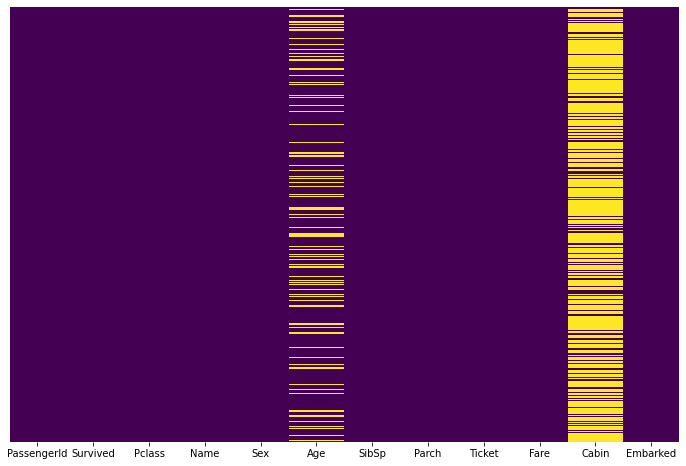

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

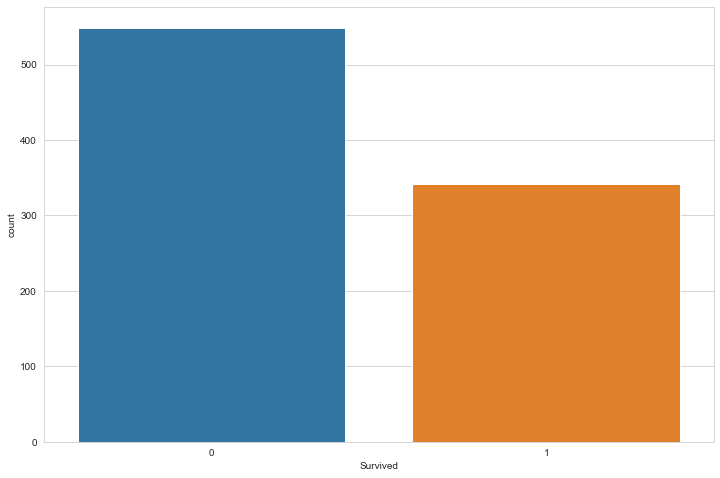

In [6]:
#Survived or not survived
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

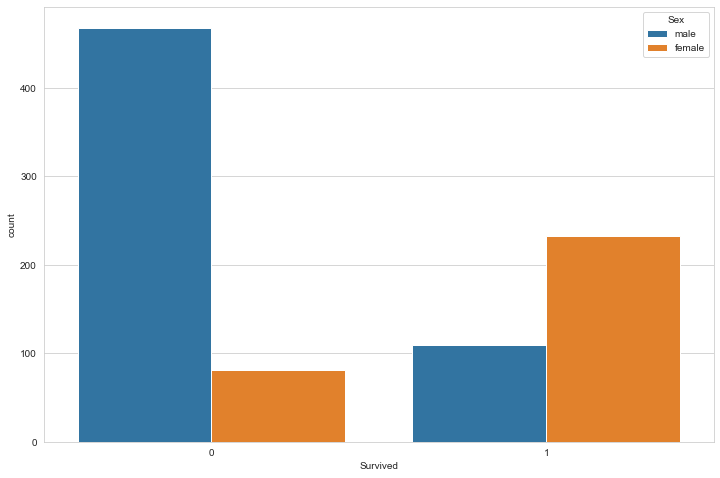

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

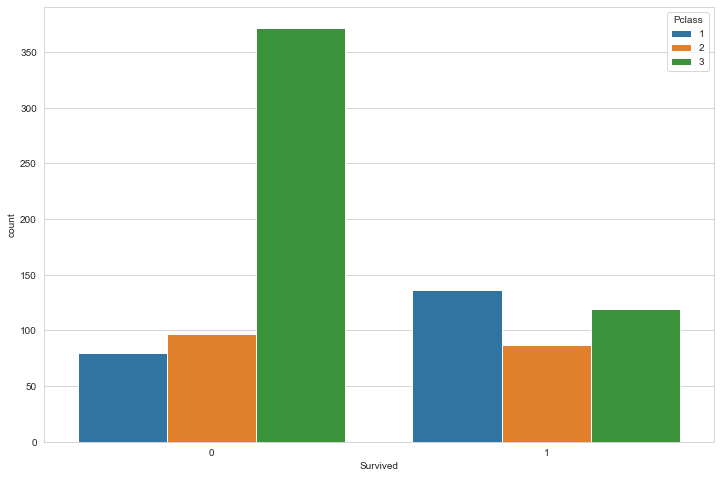

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='Survived', hue='Pclass', data=train)

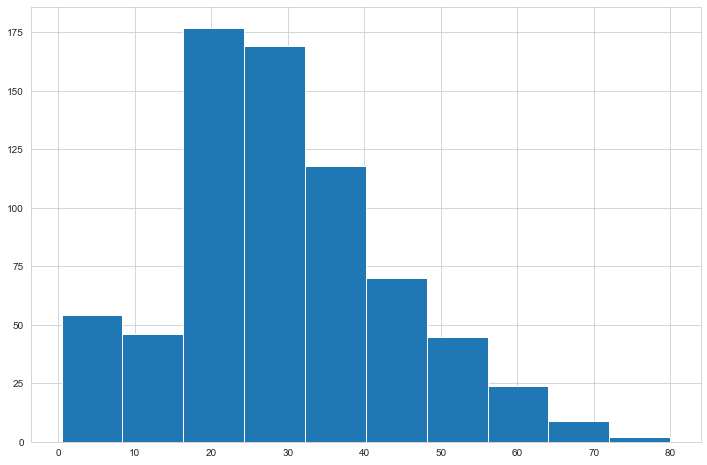

In [9]:
plt.figure(figsize=(12,8))
plt.hist(train['Age'])
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

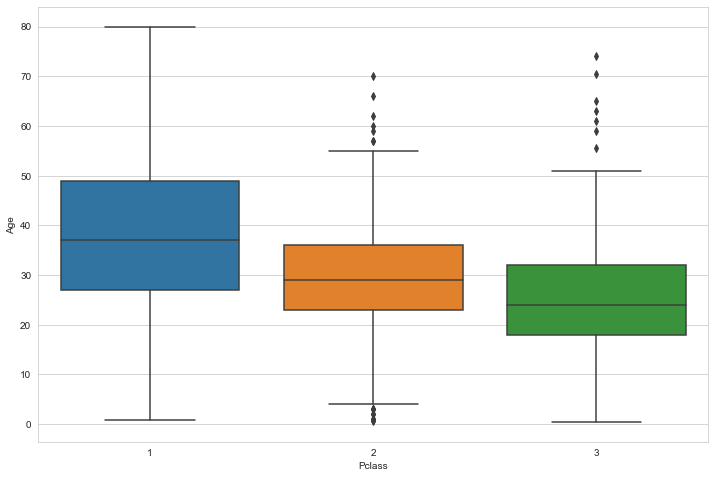

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=train)

## Cleaning data

In [11]:
train.groupby(['Pclass'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [12]:
#Magic
train['Age']=train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))

In [13]:
train['Age'].mean()

29.29287479027204

In [14]:
train['Age']=train['Age'].round()

In [15]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

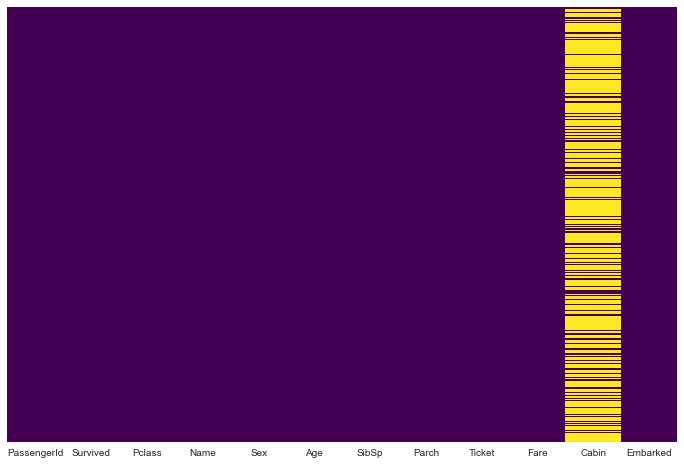

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [17]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

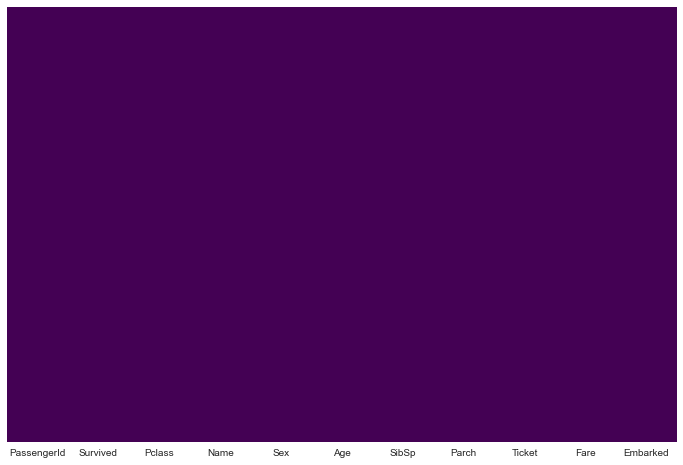

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [19]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [20]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#found on web multicollinearity

In [21]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
train =pd.concat([train,sex,embark], axis=1)

In [23]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [24]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [25]:
#Perfect data for ML
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [26]:
X=train.drop('Survived', axis=1)
y= train['Survived']

In [28]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel =LogisticRegression(solver='lbfgs',max_iter=10000)

In [53]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_test, predictions)

array([[138,  19],
       [ 30,  81]], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score, f1_score

In [64]:
def get_report(model, x_train,y_train,x_test,y_test):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # accuracy score
    acc_train = accuracy_score(y_train,y_pred_train)
    acc_test = accuracy_score(y_test,y_pred_test)

    # f1 score
    f1_score_train = f1_score(y_train,y_pred_train,average='macro')
    f1_score_test = f1_score(y_test,y_pred_test,average='macro')


    print('Accuracy Train = %0.2f'%acc_train)
    print('Accuracy Test = %0.2f'%acc_test)
    print('F1 Score Train = %0.2f'%f1_score_train)
    print('F1 Score Test = %0.2f'%f1_score_test)

In [65]:
get_report(logmodel,X_train,y_train,X_test,y_test)

Accuracy Train = 0.80
Accuracy Test = 0.82
F1 Score Train = 0.79
F1 Score Test = 0.81
